<H1>Deutsch-Jozsa Algorithm</H1>
<p>We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is:</p>
$$
f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$$<p>The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant.</p>
<p>Note that the Deutsch-Jozsa problem is an $n$-bit extension of the single bit Deutsch problem.</p>

In [2]:
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

<H3>Creating Quantum Oracles</H3> 
Let's see some different ways we can create a quantum oracle.

For a constant function, it is simple:

  1. if f(x) = 0, then apply the $I$ gate to the qubit in register 2.
  2. if f(x) = 1, then apply the $X$ gate to the qubit in register 2.

For a balanced function, there are many different circuits we can create. One of the ways we can guarantee our circuit is balanced is by performing a CNOT for each qubit in register 1, with the qubit in register 2 as the target. For example:

<img src="resources/DJ_1.PNG">

               

                
In the image above, the top three qubits form the input register, and the bottom qubit is the output register. We can see which input states give which output in the table below:           


<img src="resources/DJ_2.PNG">



We can change the results while keeping them balanced by wrapping selected controls in X-gates. For example, see the circuit and its results table below:                  


<img src="resources/DJ_3.PNG">

 

In [3]:
#  ---------  CONSTANT ORACLE  ------------
# set the length of the n-bit input string.
n = 6

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)   

display(const_oracle.draw())

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     
q_6:

In [4]:
#  ---------  BALANCED ORACLE  ------------
balanced_oracle = QuantumCircuit(n+1)
b_str = "1011"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

#Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()


# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
display(balanced_oracle.draw())

┌───┐ ░                                ░ ┌───┐
q_0: ┤ X ├─░───■────────────────────────────░─┤ X ├
     └───┘ ░   │                            ░ └───┘
q_1: ──────░───┼────■───────────────────────░──────
     ┌───┐ ░   │    │                       ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■──────────────────░─┤ X ├
     ├───┤ ░   │    │    │                  ░ ├───┤
q_3: ┤ X ├─░───┼────┼────┼────■─────────────░─┤ X ├
     └───┘ ░   │    │    │    │             ░ └───┘
q_4: ──────░───┼────┼────┼────┼────■────────░──────
           ░   │    │    │    │    │        ░      
q_5: ──────░───┼────┼────┼────┼────┼────■───░──────
           ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░      
q_6: ──────░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘└───┘└───┘└───┘ ░

/var/folders/rr/ydryh0913_q6_r11vnv6jl9m0000gn/T/ipykernel_87935/3520335815.py:14: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle


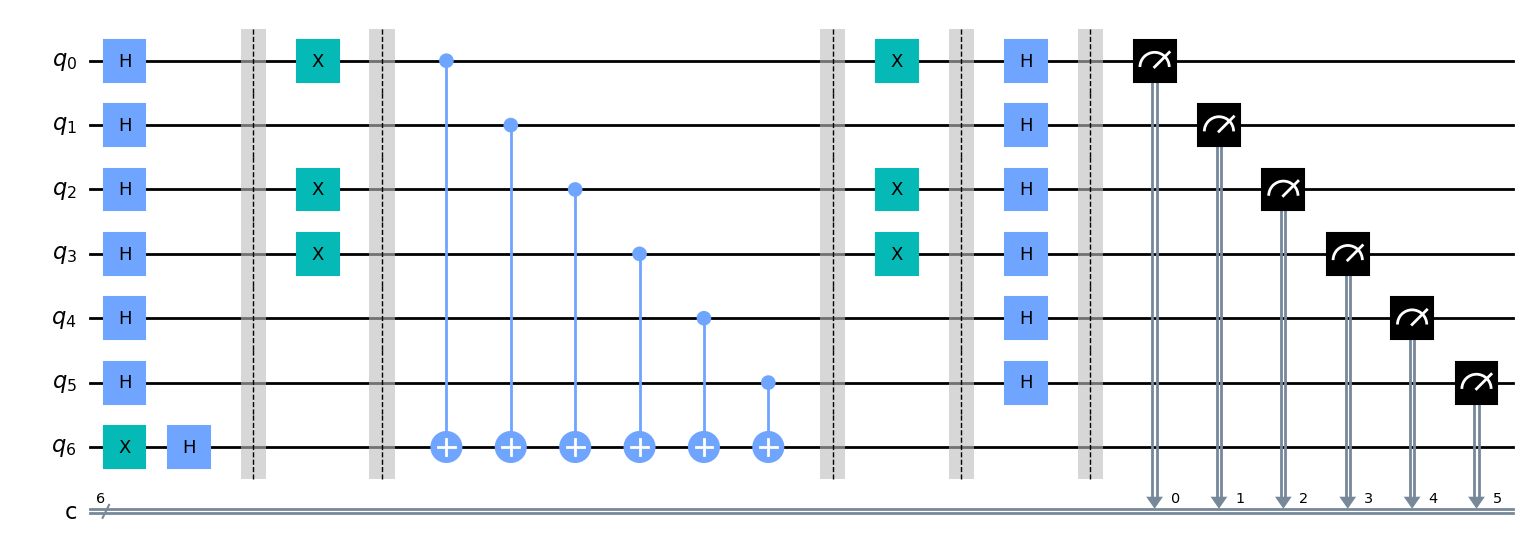

In [6]:
################################################
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.barrier()

dj_circuit += balanced_oracle
#dj_circuit += const_oracle

dj_circuit.barrier()


# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
#display(dj_circuit.draw())
display(dj_circuit.draw(output='mpl'))
#display(dj_circuit.draw(output='text'))
#display(dj_circuit.draw(output='text', reverse_bits=True))

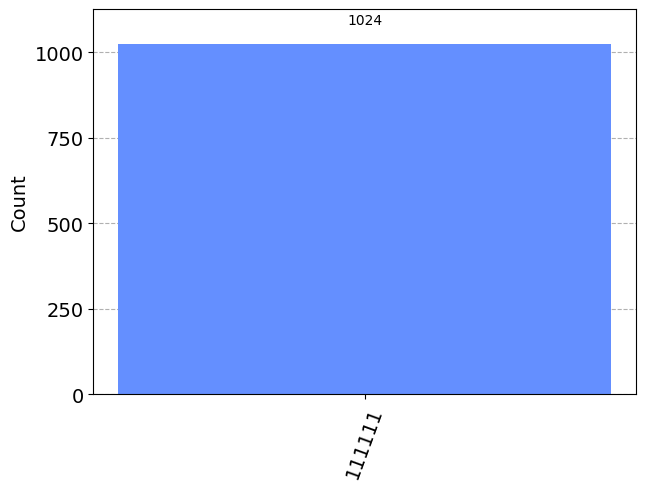

The answer is: {'111111': 1024}


In [7]:
# use local simulator
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(dj_circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

display(plot_histogram(answer))
print(f"The answer is: {answer}")

<H3>Experiment with Real Devices </H3>
We can run the circuit on the real device as shown below. We first look for the least-busy device that can handle our circuit.

In [ ]:
### Go to: https://quantum-computing.ibm.com/  and sign in. Then go to "My Account" and Copy the Token.
### Then use the Token in IBMQ.save_account('YOUR-TOKEN')

### So run the IBMQ.save_account line (by uncommenting it). From now on, you can simply call IBMQ.load_account()

### PLEASE DELETE THE TOKEN FROM THE LINE BEFORE, you don't want it to fall in someone elses hands!


# IBMQ.save_account('YOUR-TOKEN')
 
    
### Don't forget to comment the line above after you run it once.
### The token information is stored in your ~/.qiskit/qiskitrc file

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)



# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
qobj = assemble(transpiled_dj_circuit, backend)
print(qobj)
job = backend.run(qobj)
job_monitor(job, interval=2)



# Get the results of the computation
results = job.result()
answer = results.get_counts()

display(plot_histogram(answer))

least busy backend:  ibm_nairobi


/var/folders/rr/ydryh0913_q6_r11vnv6jl9m0000gn/T/ipykernel_87935/4017763458.py:16: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job is queued (21)    